In [3]:
# import libraries used throughout the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import math
from sklearn import svm, metrics, ensemble
from sklearn.model_selection import train_test_split

In [402]:
#check version
sklearn.__version__

'1.5.0'

The dataset we use is from the paper <a href="https://www.researchgate.net/publication/228780408_Using_data_mining_to_predict_secondary_school_student_performance">Using data mining to predict secondary school student performance</a> by Paulo Cortez and Alice Silva.

The following blocks use the Portugese dataset.

In [4]:
data = pd.read_csv('data/student-por.csv', delimiter=';')
# heatmap requires numerical values
data = data.replace(to_replace=['M', 'F'], value=[0,1]) #sex
data = data.replace(to_replace=['GP', 'MS'], value=[0,1]) #school
data = data.replace(to_replace=['A', 'T'], value=[0,1]) #Pstatus
data = data.replace(to_replace=['GT3', 'LE3'], value=[0,1]) #famsize
data = data.replace(to_replace=['U', 'R'], value=[0,1]) #address
data = data.replace(to_replace=['father', 'mother'], value=[0,1]) #guardian
data = data.replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0,1,2,3,4]) #Mjob, Fjob
data = data.replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0,1,2,3]) #reason
data = data.replace(to_replace=['no', 'yes'], value=[0,1]) #fatherd, nursery, higher, famsup, romantic
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [405]:
# split data for training and testing (80:20), use all features except predictors and contributors
features = data
X = features.drop(columns=['G3', 'G1', 'G2'])
y = data['G3'] # predict final grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# binary classifier: pass if >= 10, else fail

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] >= 10:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] >= 10:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

# we use SVM, paper tried 5 different models
clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) # 88.5% accuracy

0.8846153846153846

In [406]:
# 5 level classification as defined in paper
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_5 = y_train.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
y_test_5 = y_test.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
clf = svm.SVC().fit(X_train, y_train_5)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_5, pred) # 36.9% accuracy

0.36923076923076925

In [407]:
# split data for training and testing (80:20), use all features except predictor, sensitive attribute, and best predictors for sex
features = data
X = features.drop(columns=['G3', 'G1', 'G2', 'sex', 'Walc'])
y = data['G3'] # predict final grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [408]:
# binary classifier: pass if >= 10, else fail

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] >= 10:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] >= 10:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

# we use SVM, paper tried 5 different models
clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) # 93.1% accuracy

0.8846153846153846

In [409]:
# 5 level classification as defined in paper
y_train_5 = y_train.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
y_test_5 = y_test.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
clf = svm.SVC().fit(X_train, y_train_5)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_5, pred) # 70% accuracy

0.36153846153846153

In [410]:
# classification: try to predict sensitive attribute (sex) using best feature
features = data[['Walc']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred) # 71.5% accuracy

0.6230769230769231

In [411]:
# classification: predict sensitive attribute using all features except predictor, grades
features = data
X = features.drop(columns=['G1', 'G2', 'G3', 'sex'])
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred) #73.1% accuracy

0.7307692307692307

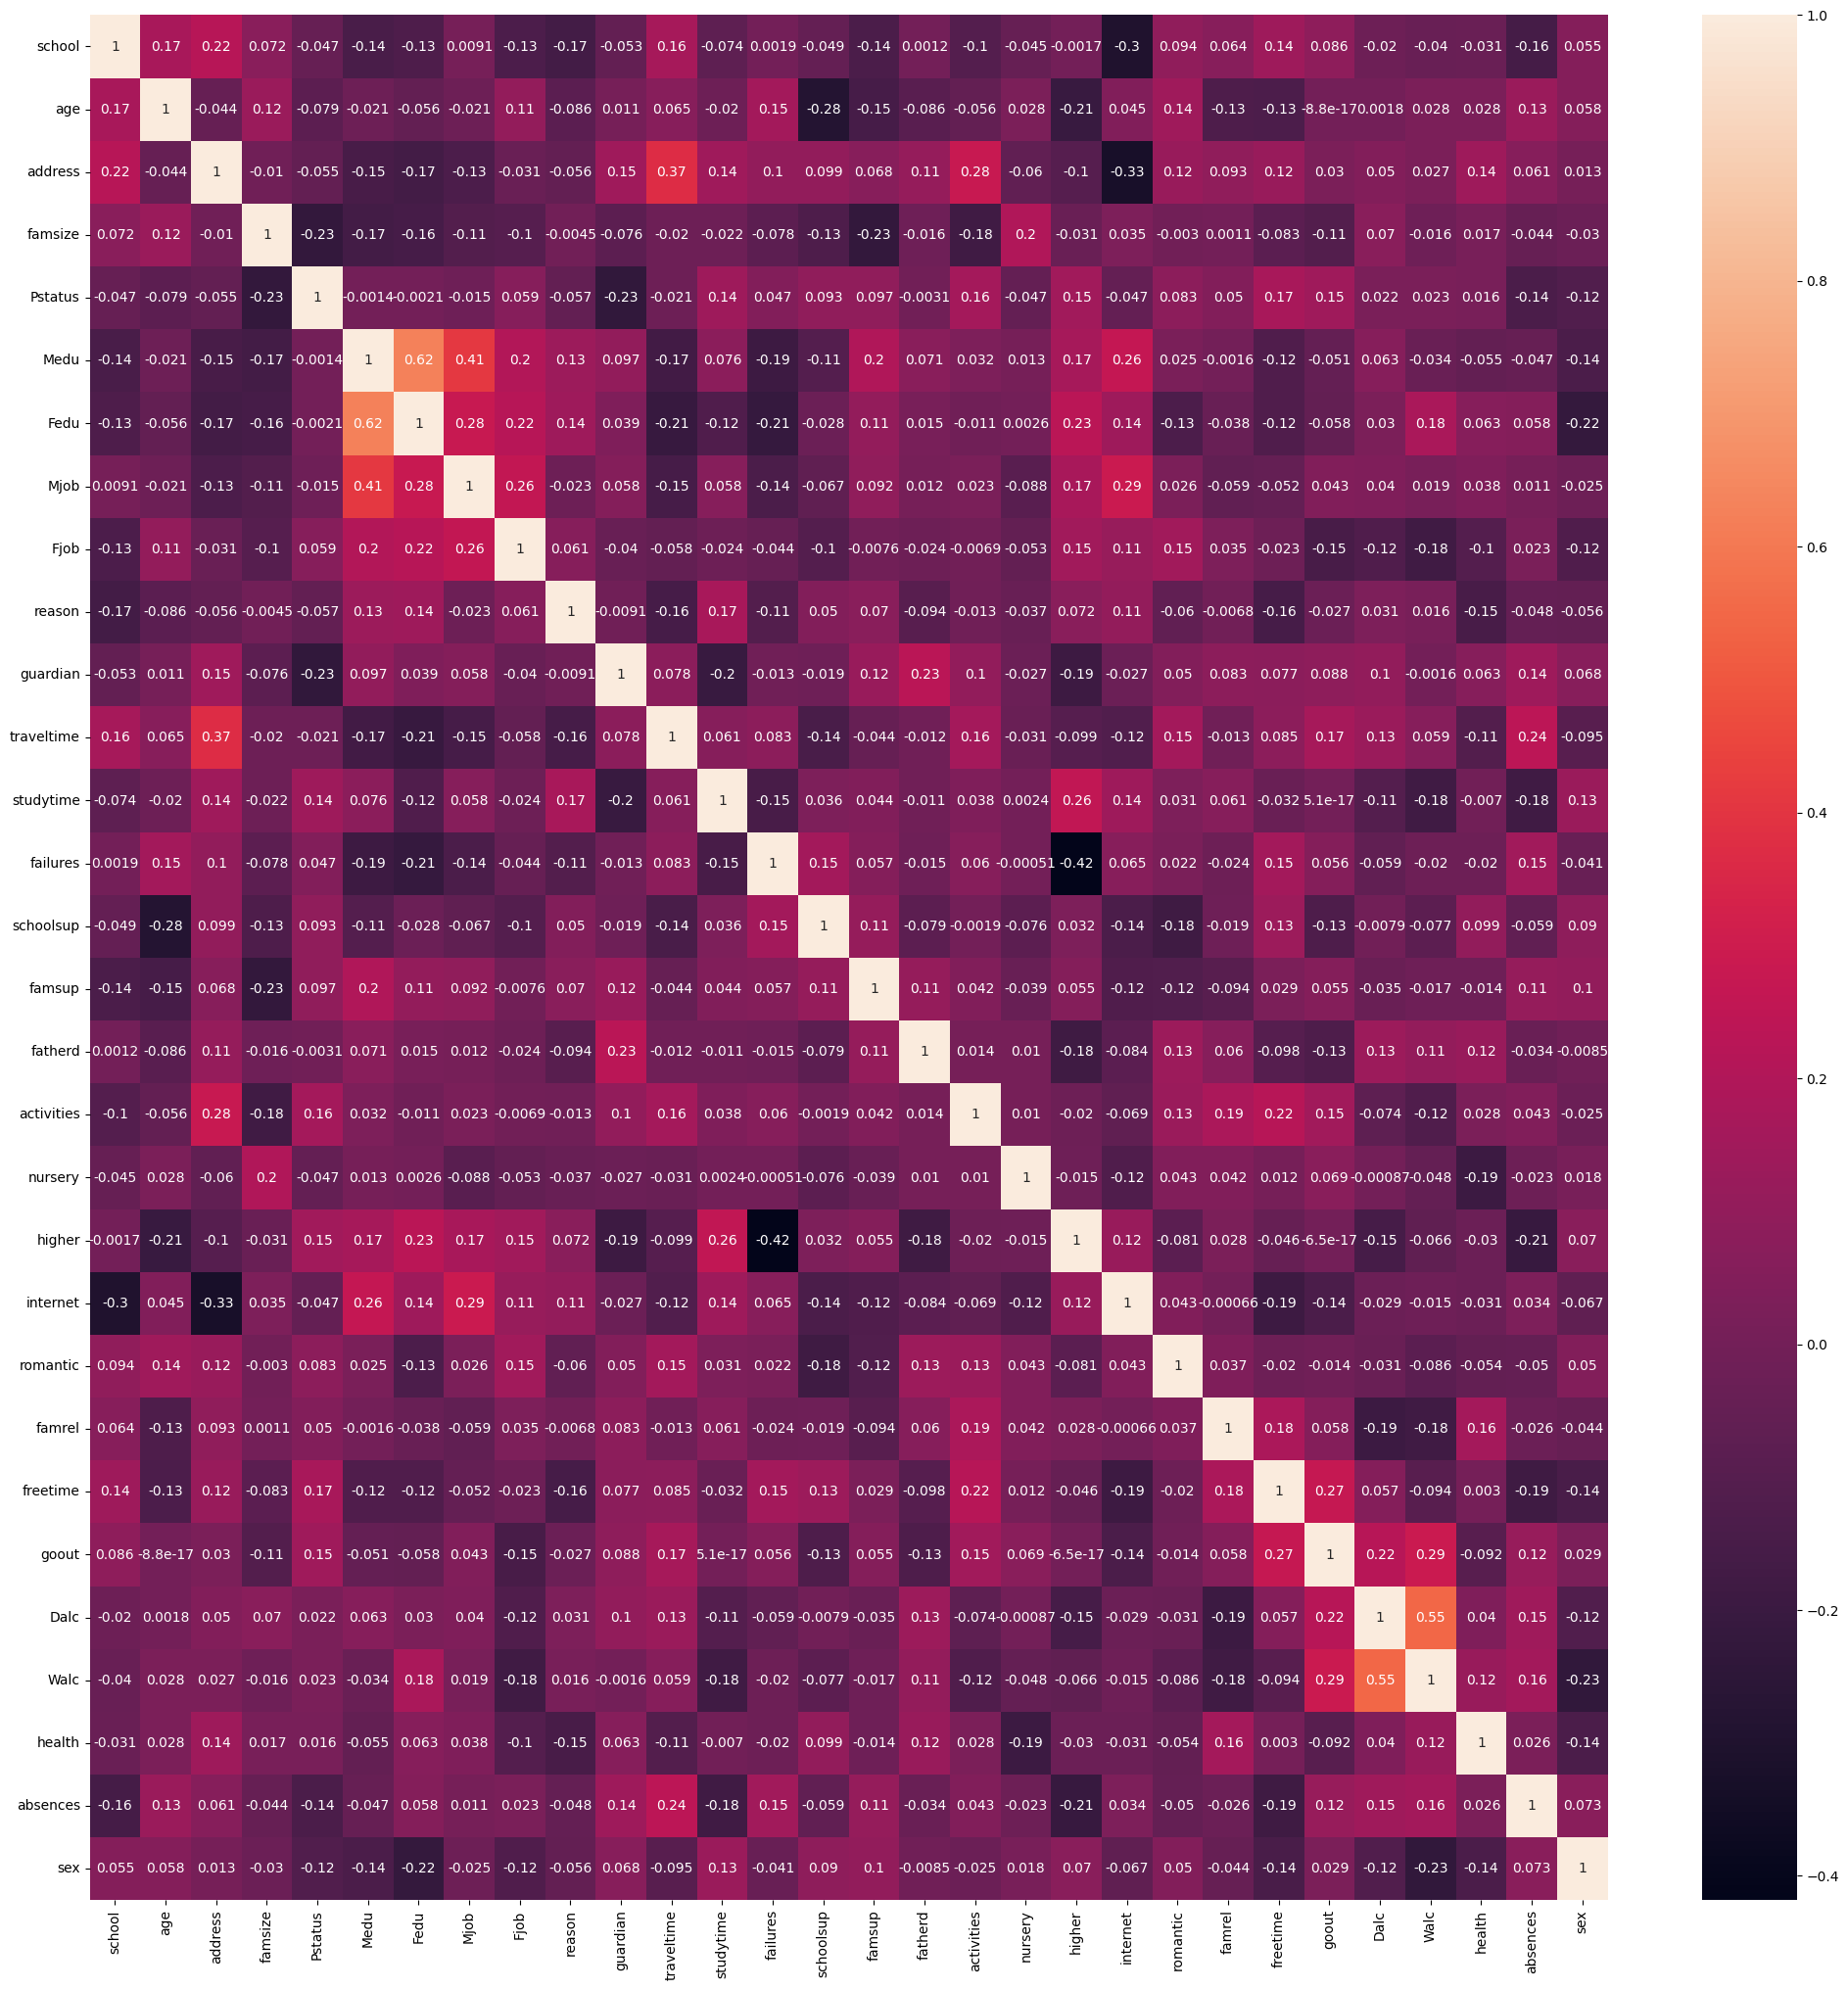

In [412]:
corr_data = X_test.join(y_test).select_dtypes(include='number')
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr, annot=True)

In [413]:
# classification: predict sensitive attribute using all features except predictor, grades
features = data
X = features.drop(columns=['G1', 'G2', 'G3', 'Pstatus'])
y = data['Pstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred) #83.8% accuracy

0.8384615384615385

In [414]:
# SVM: group education by higher and non-higher, predict sensitive attribute using all features except predictor, grades
features = data
X = features.drop(columns=['G1', 'G2', 'G3', 'Medu'])
y = data['Medu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] == 4:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] == 4:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #80% accuracy

0.8

In [415]:
# SVM: group education by higher and non-higher, predict sensitive attribute using highly correlated features
features = data
X = features[['Mjob', 'failures', 'Fedu', 'traveltime']]
y = data['Medu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] == 4:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] == 4:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #89.2% accuracy

0.8923076923076924

In [416]:
# SVM: predict sensitive attribute using all features except predictor, final grade
features = data
X = features.drop(columns=['Fedu', 'G1', 'G2', 'G3'])
y = data['Fedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] == 4:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] == 4:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #73.8% accuracy

0.7384615384615385

In [417]:
# SVM: predict combined education level by adding edu levels, use all features except edu levels and final grade
data['combined_pedu'] = data['Medu'] + data['Fedu']
features = data
X = features.drop(columns=['combined_pedu', 'Fedu', 'Medu', 'G1', 'G2', 'G3'])
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] > 6:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] > 6:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #71.5% accuracy

0.7153846153846154

In [418]:
# SVM: predict combined education level by adding edu levels, use all features except edu levels and final grade
data['combined_pedu'] = data['Medu'] + data['Fedu']
features = data
X = features[['failures', 'Mjob', 'Fjob', 'traveltime']]
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] > 6:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] > 6:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #82.3% accuracy

0.823076923076923

In [6]:
# SVM: predict combined education level by adding edu levels, use all features except edu levels and final grade
data['combined_pedu'] = data['Medu'] + data['Fedu']
features = data
X = features.drop(columns=['combined_pedu', 'Fedu', 'Medu', 'G1', 'G2', 'G3'])
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CHANGED RECODING THRESHOLD FROM 6 TO 7 
# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] > 7:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] > 7:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #71.5% accuracy

0.7769230769230769

In [5]:
# SVM: predict combined education level by adding edu levels, use all features except edu levels and final grade
data['combined_pedu'] = data['Medu'] + data['Fedu']
features = data
X = features[['failures', 'Mjob', 'Fjob', 'traveltime']]
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CHANGED RECODING THRESHOLD FROM 6 TO 7 
# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] > 7:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] > 7:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) #86.15% accuracy

0.8615384615384616

The following blocks use the Mathematics dataset.

In [419]:
data = pd.read_csv('data/student-mat.csv', delimiter=';')
# heatmap requires numerical values
data = data.replace(to_replace=['M', 'F'], value=[0,1]) #sex
data = data.replace(to_replace=['GP', 'MS'], value=[0,1]) #school
data = data.replace(to_replace=['A', 'T'], value=[0,1]) #Pstatus
data = data.replace(to_replace=['GT3', 'LE3'], value=[0,1]) #famsize
data = data.replace(to_replace=['U', 'R'], value=[0,1]) #address
data = data.replace(to_replace=['father', 'mother'], value=[0,1]) #guardian
data = data.replace(to_replace=['at_home', 'health', 'other', 'services', 'teacher'], value=[0,1,2,3,4]) #Mjob, Fjob
data = data.replace(to_replace=['course', 'other', 'home', 'reputation'], value=[0,1,2,3]) #reason
data = data.replace(to_replace=['no', 'yes'], value=[0,1]) #fatherd, nursery, higher, famsup, romantic
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


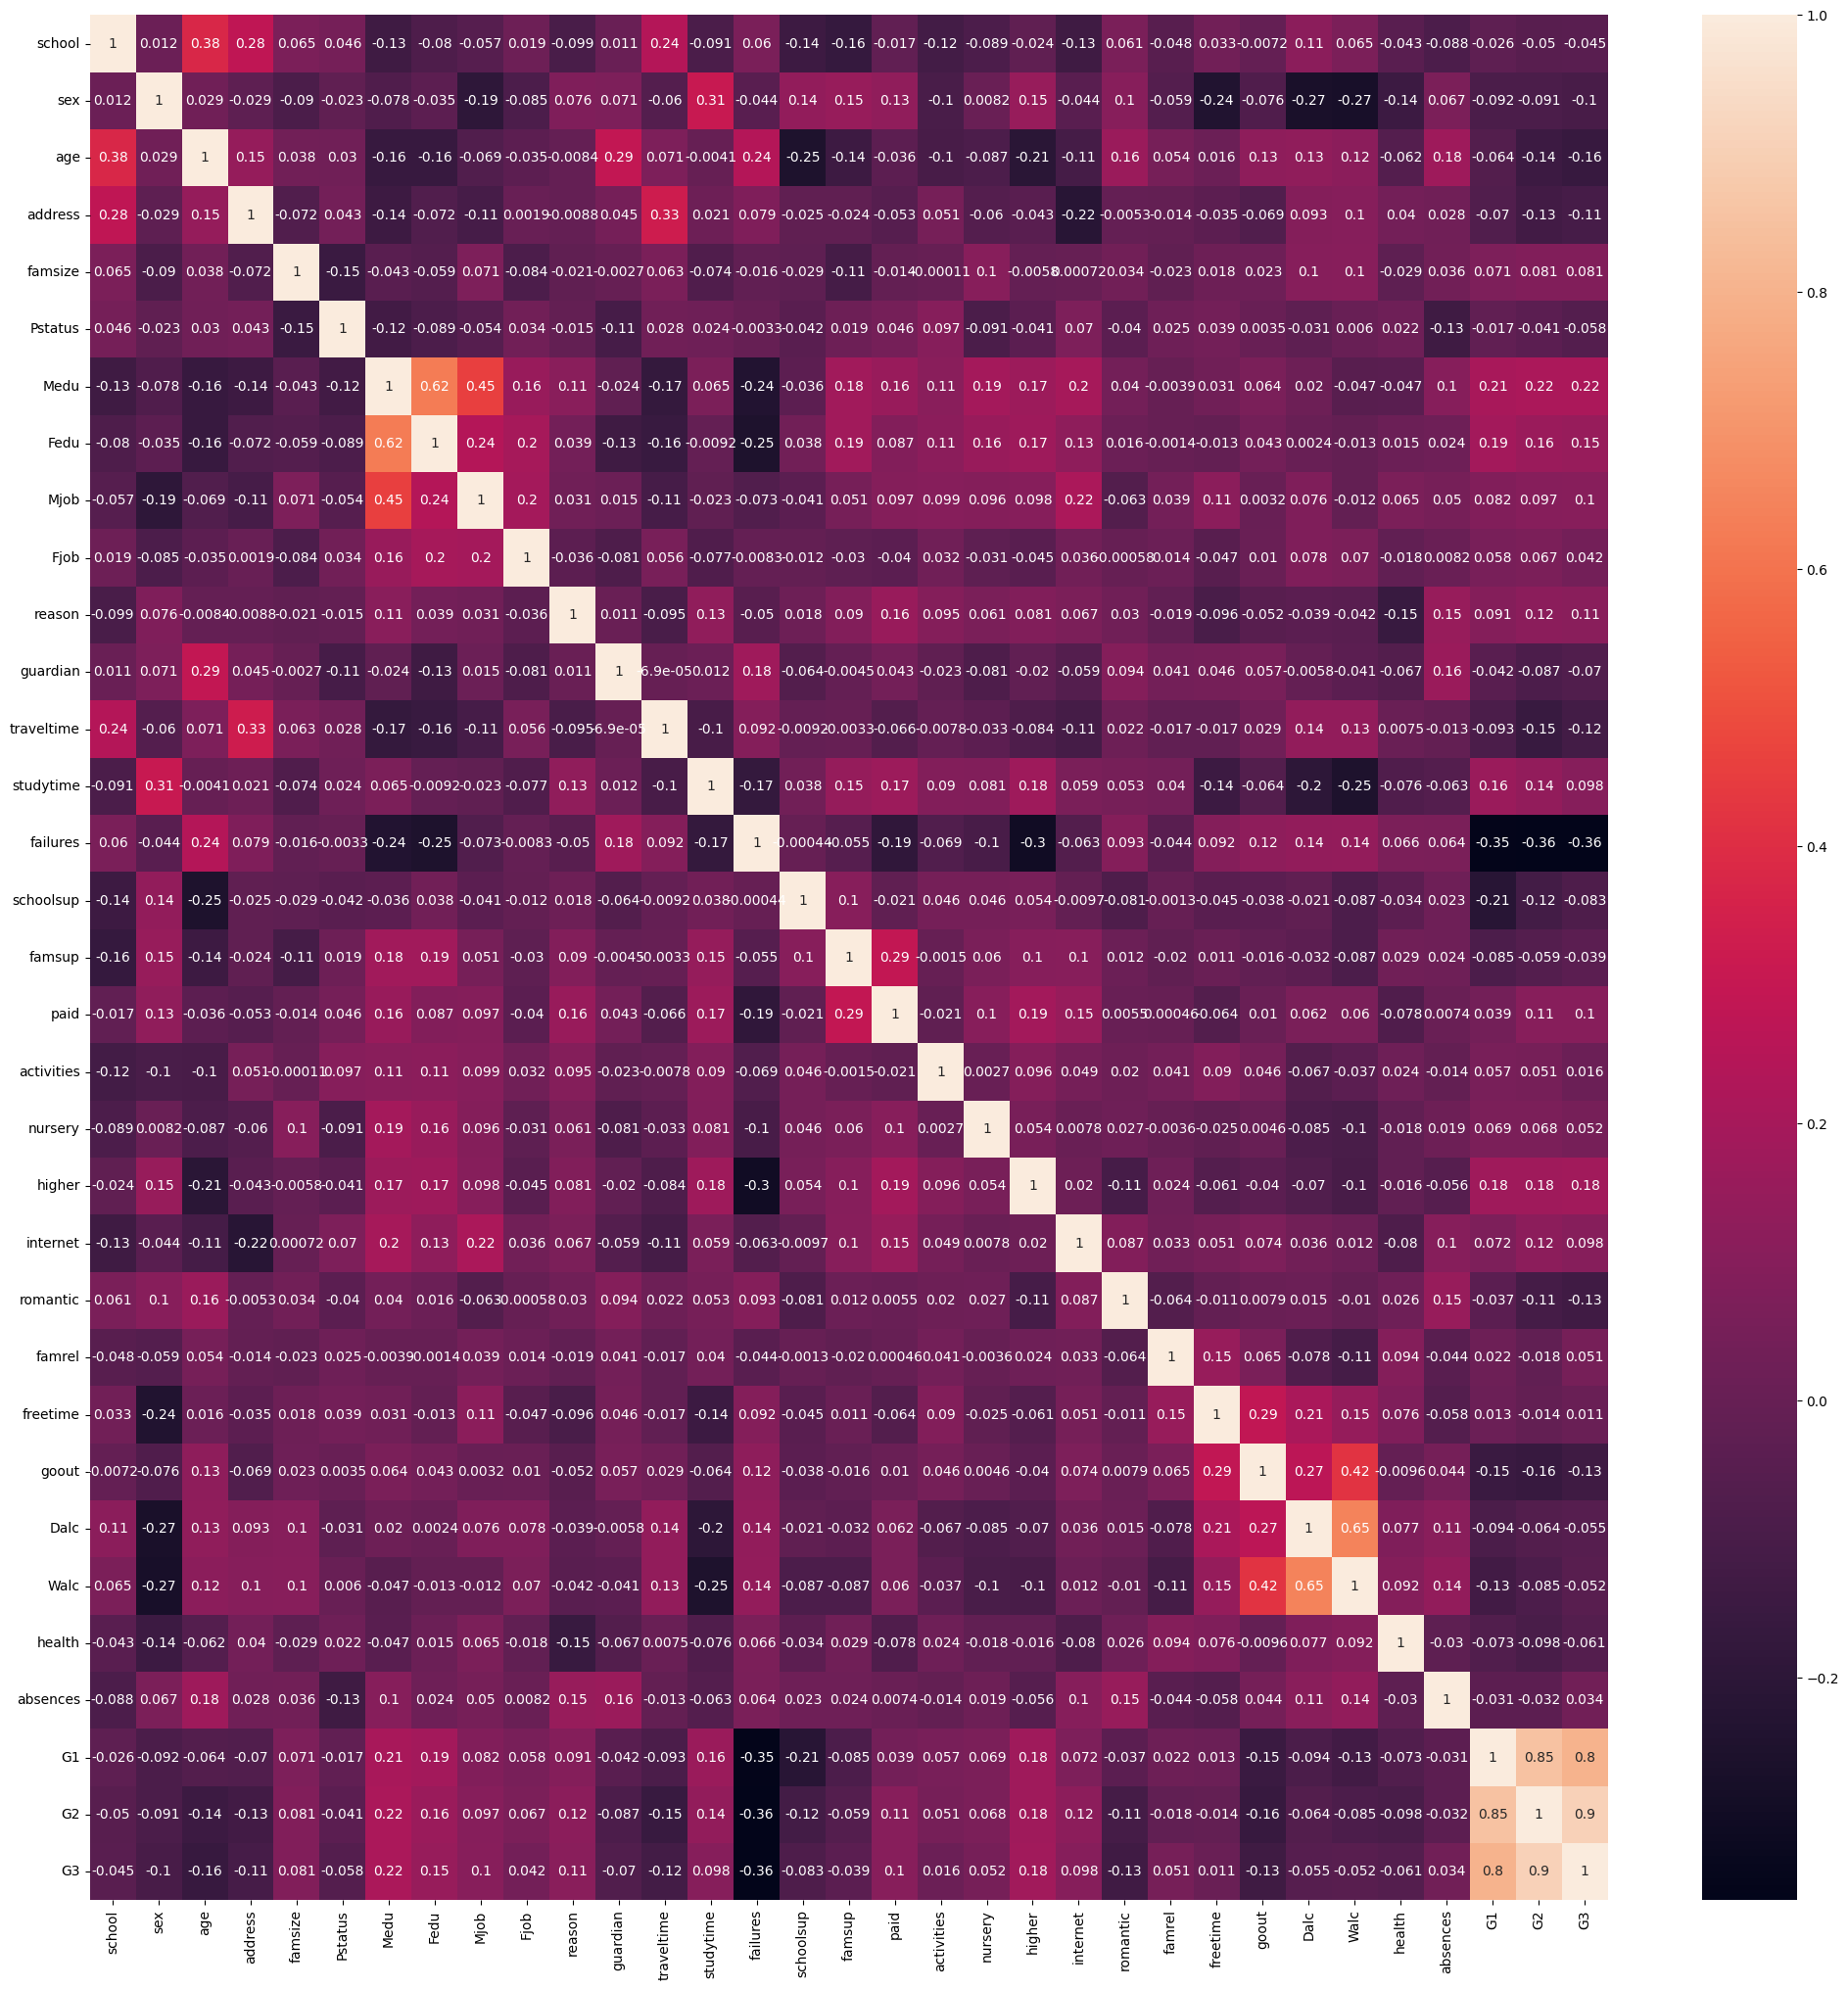

In [420]:
# add correlation matrix to see which features are highly correlated
corr_data = data.select_dtypes(include='number')
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr, annot=True)

# features highly correlated with sex: studytime, Dalc(-), Walc(-), freetime(-), Mjob(-), higher, schoolsup, famsup, health(-), paid

In [421]:
# RF classifier: predict sex from features
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = ensemble.RandomForestClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
metrics.f1_score(y_test, pred)

0.5714285714285714

In [422]:
# SVM classifier: predict sex from features
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
metrics.f1_score(y_test, pred)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.59      0.62        41
           1       0.60      0.66      0.62        38

    accuracy                           0.62        79
   macro avg       0.62      0.62      0.62        79
weighted avg       0.62      0.62      0.62        79



In [423]:
# RF classifier: predict cohabitation from features
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['Pstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = ensemble.RandomForestClassifier().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
metrics.f1_score(y_test, pred)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.14      0.24        14
           1       0.90      0.99      0.94       105

    accuracy                           0.89       119
   macro avg       0.78      0.57      0.59       119
weighted avg       0.87      0.89      0.86       119



In [424]:
# SVM classifier: predict cohabitation from features
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['Pstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
# metrics.f1_score(y_test, pred)

0.8860759493670886

This part is to predict G3 for the mathematics data excluding itself, G1, and G2

In [425]:
# split data for training and testing (80:20), use all features except predictor and sensitive attribute
features = data
X = features.drop(columns=['G3', 'sex'])
y = data['G3'] # predict final grade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [426]:
# binary classifier: pass if >= 10, else fail

# redefine values for binary classification
y_train_binary = y_train.tolist()
y_test_binary = y_test.tolist()
for i in range(len(y_train_binary)):
    if y_train_binary[i] >= 10:
        y_train_binary[i] = 1
    else:
        y_train_binary[i] = 0
for i in range(len(y_test_binary)):
    if y_test_binary[i] >= 10:
        y_test_binary[i] = 1
    else:
        y_test_binary[i] = 0

# we use SVM, paper tried 5 different models
clf = svm.SVC().fit(X_train, y_train_binary)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_binary, pred) # 93.1% accuracy

0.8860759493670886

In [427]:
# 5 level classification as defined in paper
y_train_5 = y_train.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
y_test_5 = y_test.replace(to_replace=[[20, 19, 18, 17, 16], [15, 14], [13, 12], [11, 10], [9,8,7,6,5,4,3,2,1]], value=[1, 2, 3, 4, 5])
clf = svm.SVC().fit(X_train, y_train_5)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test_5, pred) # 70% accuracy

0.6708860759493671

deprecated: we tried making these models, but we decided not to use them in the end

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         7
           4       0.18      0.38      0.24        16
           5       0.00      0.00      0.00         5
           6       0.06      0.07      0.06        15
           7       0.18      0.25      0.21         8
           8       0.55      0.35      0.43        17

    accuracy                           0.19        79
   macro avg       0.14      0.15      0.13        79
weighted avg       0.18      0.19      0.17        79



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packag

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

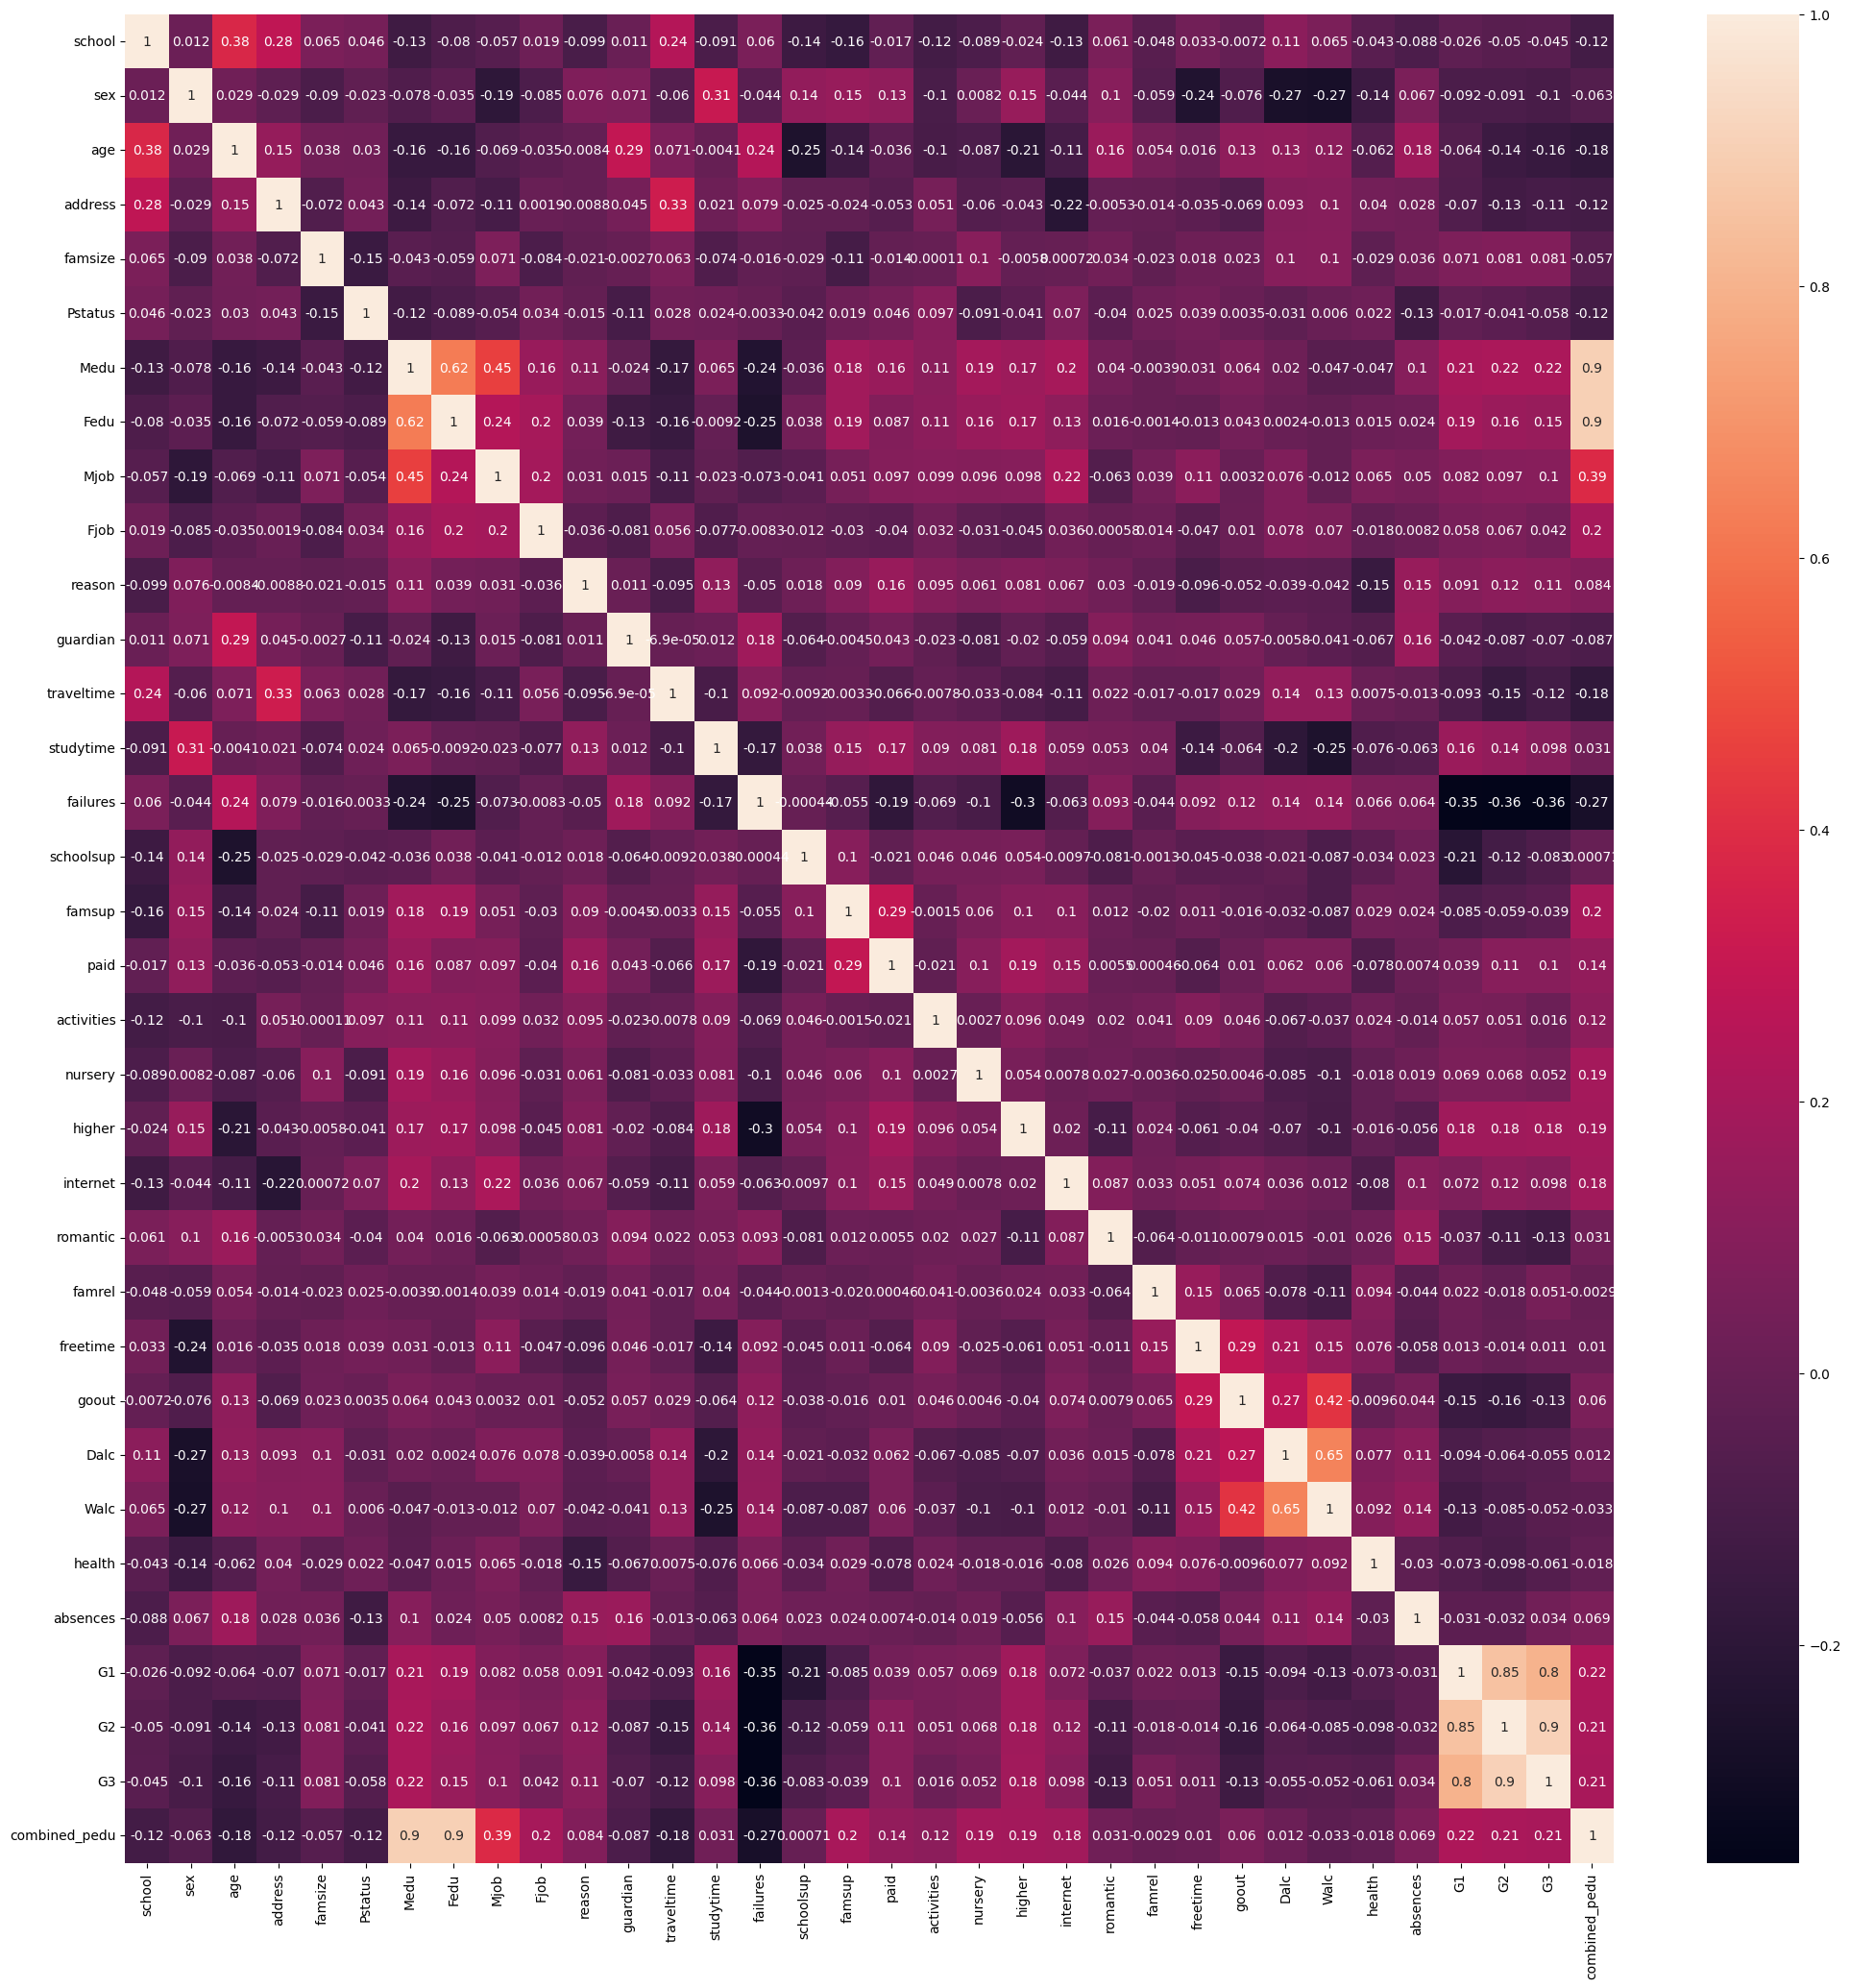

In [429]:
# add correlation matrix to see which features are highly correlated
corr_data = data.select_dtypes(include='number')
corr = corr_data.corr()
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(corr, annot=True)

# classification: try to predict sensitive attribute (sex) using highly correlated features
features = data[['Dalc', 'Walc', 'studytime', 'freetime']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred) # 75.4% accuracy

# regression: score determined by RMSE
regr = svm.SVR().fit(X_train, y_train)
pred = regr.predict(X_test)
metrics.mean_squared_error(y_test, pred) # 1.70

# regression: predict whether parents are cohabitating
features = data[['famsize', 'guardian', 'address', 'Walc', 'activities', 'romantic', 'internet']]
X = features
y = data['Pstatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_train).fit()
params = regr.params
regr.summary()

# regression: predict whether student is male or female
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_train).fit()
params = regr.params
regr.summary()

# SVM classifier: predict combined education from features
data['combined_pedu'] = round((data['Medu'] + data['Fedu']) / 2)
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
metrics.classification_report(y_test, pred)
# metrics.f1_score(y_test, pred)

# same as above, but this time, use intersectional fairness
data['combined_pedu'] = data['Medu'] + data['Fedu']
features = data[['studytime', 'Walc', 'freetime', 'Mjob', 'schoolsup', 'health']]
X = features
y = data['combined_pedu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
print(metrics.classification_report(y_test, pred))
metrics.f1_score(y_test, pred)